 Heart Rate for Emotion Recognition
 ----------------------------------------------
## Loading Packages and Library

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
from IPython.display import display, Markdown
import plotly.graph_objs as go
import plotly.offline as py
from scipy.stats import pearsonr
import seaborn as sns
sns.set(style='darkgrid')

## Loading dataset 

In [2]:
files = os.path.join("ER_dataset/", "*.csv")
files = glob.glob(files)

In [3]:
df = pd.concat(map(pd.read_csv, files))


###  Rename Columns
We rename columns, because it makes confusing to identify. We will try to rename this column to make it easily understandable.

In [4]:
df.columns = ['# condition','emotion','Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7']


### Check out Missing Values

In [5]:
df.describe()

,# condition,emotion,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7
count,648998.000000,648998.000000,648998.000000,648998.000000,648998.000000,648998.000000,648998.000000,648998.000000,648998.000000
mean,0.969112,-0.000351,-0.001486,-0.000316,-0.000632,-1.831748,0.475176,1.720212,97.414063
std,0.827098,0.816677,1.912070,1.764197,1.329373,91.743785,62.062532,111.971341,30.647844
min,0.000000,-1.000000,-31.931080,-31.652325,-32.722332,-1876.209961,-903.489990,-1029.839966,0.000000
25%,0.000000,-1.000000,-1.117949,-1.047408,-0.726843,-43.049999,-30.309999,-49.349998,91.000000
50%,1.000000,0.000000,-0.002367,0.011737,-0.006636,-1.400000,0.210000,2.730000,104.000000
75%,2.000000,1.000000,1.128564,1.032658,0.725245,40.250000,30.799999,51.799999,112.000000
max,2.000000,1.000000,42.823997,31.638508,26.596994,2034.550049,741.159973,1005.410034,224.000000


In [6]:
# Check out data types, missing values and more
df.info()

print()
print(f'Shape of the dataset')
print(f'Number of Features: {df.shape[1]}')
print(f'Number of Observations: {df.shape[0]}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648998 entries, 0 to 19955
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   # condition  648998 non-null  int64  
 1   emotion      648998 non-null  int64  
 2   Feature 1    648998 non-null  float64
 3   Feature 2    648998 non-null  float64
 4   Feature 3    648998 non-null  float64
 5   Feature 4    648998 non-null  float64
 6   Feature 5    648998 non-null  float64
 7   Feature 6    648998 non-null  float64
 8   Feature 7    648998 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 49.5 MB

Shape of the dataset
Number of Features: 9
Number of Observations: 648998


In [7]:
# Check missing values
df.isnull().sum()

# condition    0
emotion        0
Feature 1      0
Feature 2      0
Feature 3      0
Feature 4      0
Feature 5      0
Feature 6      0
Feature 7      0
dtype: int64



As we can see above, this dataset does not have any null or missing value. This time we can skip the data cleaning procedure.


 ## Exploratory Data Analysis (EDA)

Now we explore this dataset to understand what it looks like and check out statistics by using visualization technique.

 Target Variable = Emotion

Emotion is a target variable for the heart disease. We will look at the number and proportion of each Condition vablues by pie chart.

In [17]:
import plotly.graph_objects as go
import plotly.offline as py

# Create the pie chart
results = df['emotion'].value_counts()
values = [results[-1], results[0], results[1]]
labels = ['-1', '0', '1']
colors = ['MediumSeaGreen', 'Coral', 'red']

fig_pie = go.Figure(data=[go.Pie(labels=labels, values=values,
                                 marker={'colors': colors, 
                                         'line': {'color': 'Black', 'width': 2}})])

# Save the Plotly figure as an image
fig_pie.write_image("Images/ratio.png")
    

# Optionally, display the plot in a notebook or browser
py.iplot(fig_pie)


#### Observations

  All Emotions have same proportion. 

### Distribution of Features

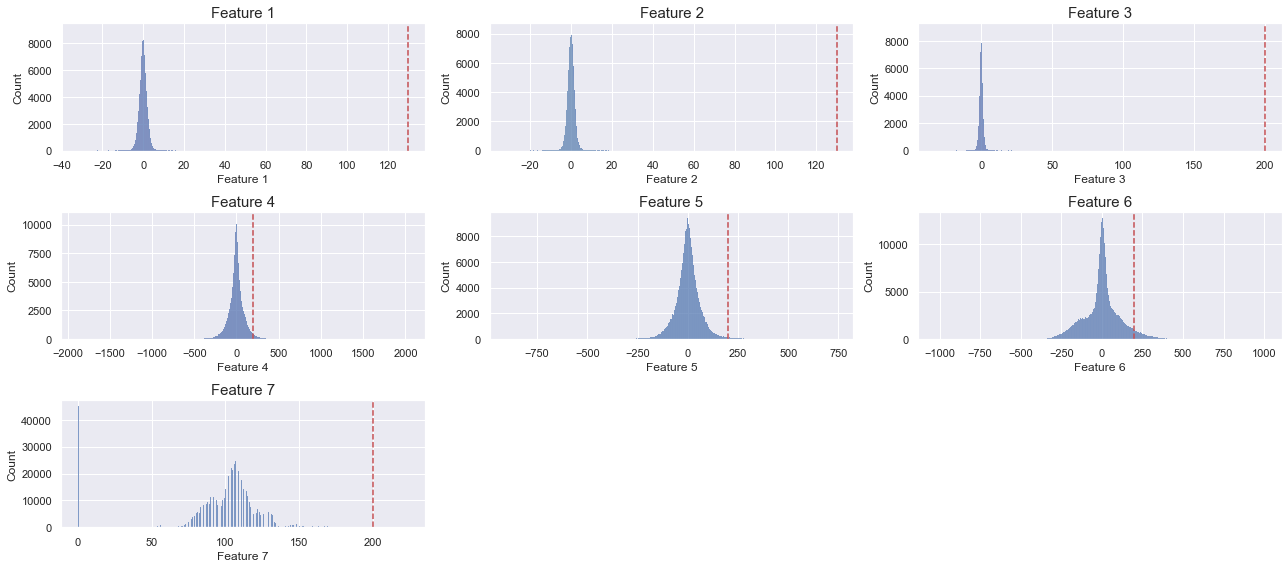

In [18]:
def features_dist(data):
    """
    Show distributions of all feature
    """
    fig = plt.figure(figsize=(18, 8))
    
    # Feature 1
    plt.subplot(3, 3, 1)
    sns.histplot(data['Feature 1'])
    plt.title('Feature 1', fontsize=15)
    plt.axvline(x=130, color='r', linestyle='--')
    
    
    # Feature 2
    plt.subplot(3, 3, 2)
    sns.histplot(data['Feature 2'])
    plt.title('Feature 2', fontsize=15)
    plt.axvline(x=130, color='r', linestyle='--')
     
        
        
   # Feature 3
    plt.subplot(3, 3, 3)
    sns.histplot(data['Feature 3'])
    plt.title('Feature 3', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--')
    
    
    # Feature 4
    plt.subplot(3, 3, 4)
    sns.histplot(data['Feature 4'])
    plt.title('Feature 4', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--')
    
  
    
    # Feature 5
    plt.subplot(3, 3, 5)
    sns.histplot(data['Feature 5'])
    plt.title('Feature 5', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--')
    
    
    # Feature 6
    plt.subplot(3, 3, 6)
    sns.histplot(data['Feature 6'])
    plt.title('Feature 6', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--')
    
    
    # Feature 7
    plt.subplot(3, 3, 7)
    sns.histplot(data['Feature 7'])
    plt.title('Feature 7', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--')
  

    plt.tight_layout()
    plt.savefig("Images\dictribution.png")
    plt.show()
    
    
features_dist(df)



### Observations

Apparently all features expect feature  7 is quite close to a normal distribution.
The average of them are approxmatly to zero. It seems to me that fearture  7 follow a right-skewed distribution (lognormal).



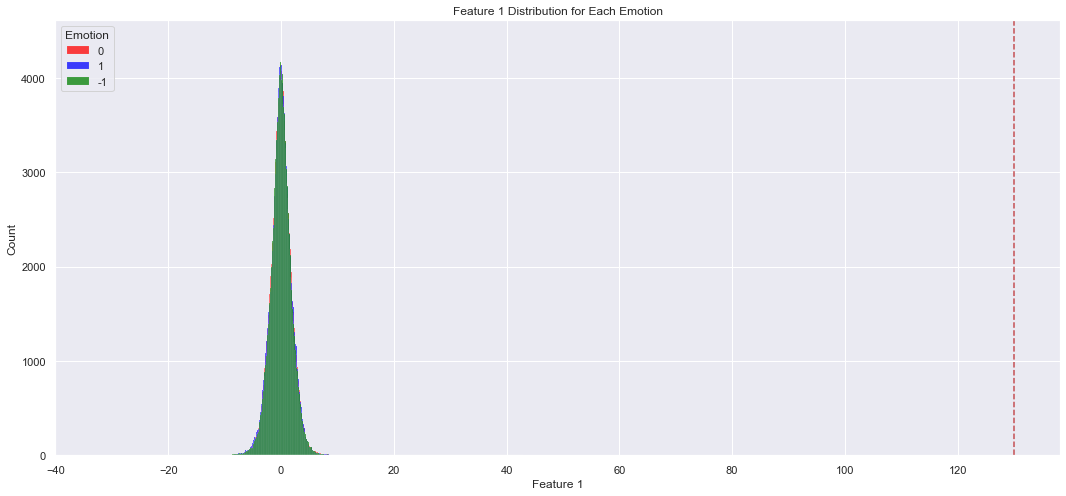

In [47]:
fig = plt.figure(figsize=(18,8))


Feat1_emo0 = df[df['emotion']==0]['Feature 1']
Feat1_emo1 = df[df['emotion']==1]['Feature 1']
Feat1_emo_1 = df[df['emotion']==-1]['Feature 1']
sns.histplot(Feat1_emo0, color='Red')   
sns.histplot(Feat1_emo1, color='Blue')
sns.histplot(Feat1_emo_1, color='Green')
plt.title('Feature 1 Distribution for Each Emotion')
plt.gca().legend(title='Emotion', labels=['0','1', '-1'])
plt.axvline(x=130, color='r', linestyle='--')

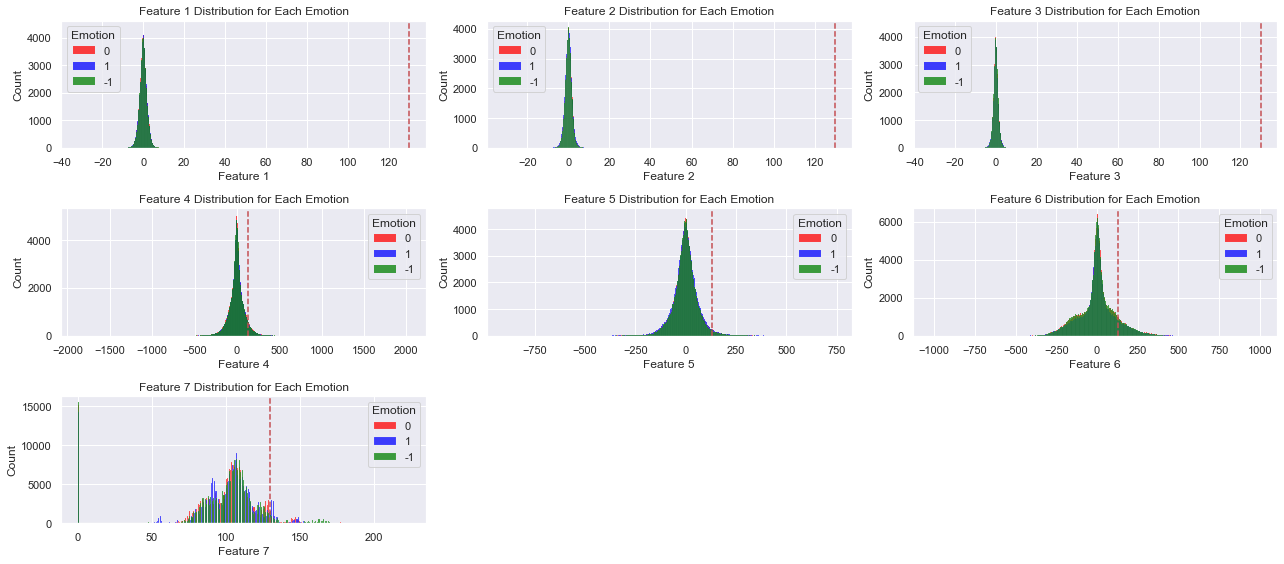

In [40]:
def features_dist_emotion(data):
    """
    Show distributions of all featurs for each emotions
    """
    fig = plt.figure(figsize=(18,8))
    
    # Feature 1
    plt.subplot(3, 3, 1)
    Feat1_emo0 = data[data['emotion']==0]['Feature 1']
    Feat1_emo1 = data[data['emotion']==1]['Feature 1']
    Feat1_emo_1 = data[data['emotion']==-1]['Feature 1']
    sns.histplot(Feat1_emo0, color='Red')   
    sns.histplot(Feat1_emo1, color='Blue')
    sns.histplot(Feat1_emo_1, color='Green')
    plt.title('Feature 1 Distribution for Each Emotion')
    plt.gca().legend(title='Emotion', labels=['0','1', '-1'])
    plt.axvline(x=130, color='r', linestyle='--')
    
    # Feature 2
    plt.subplot(3, 3, 2)
    Feat2_emo0 = data[data['emotion']==0]['Feature 2']
    Feat2_emo1 = data[data['emotion']==1]['Feature 2']
    Feat2_emo_1 = data[data['emotion']==-1]['Feature 2']
    sns.histplot(Feat2_emo0, color='Red')   
    sns.histplot(Feat2_emo1, color='Blue')
    sns.histplot(Feat2_emo_1, color='Green')
    plt.title('Feature 2 Distribution for Each Emotion')
    plt.gca().legend(title='Emotion', labels=['0','1', '-1'])
    plt.axvline(x=130, color='r', linestyle='--')
    
    # Feature 3
    plt.subplot(3, 3, 3)
    Feat3_emo0 = data[data['emotion']==0]['Feature 3']
    Feat3_emo1 = data[data['emotion']==1]['Feature 3']
    Feat3_emo_1 = data[data['emotion']==-1]['Feature 3']
    sns.histplot(Feat3_emo0, color='Red')   
    sns.histplot(Feat3_emo1, color='Blue')
    sns.histplot(Feat3_emo_1, color='Green')
    plt.title('Feature 3 Distribution for Each Emotion')
    plt.gca().legend(title='Emotion', labels=['0','1', '-1'])
    plt.axvline(x=130, color='r', linestyle='--')
    

    
  # Feature 4
    plt.subplot(3, 3, 4)
    Feat4_emo0 = data[data['emotion']==0]['Feature 4']
    Feat4_emo1 = data[data['emotion']==1]['Feature 4']
    Feat4_emo_1 = data[data['emotion']==-1]['Feature 4']
    sns.histplot(Feat4_emo0, color='Red')   
    sns.histplot(Feat4_emo1, color='Blue')
    sns.histplot(Feat4_emo_1, color='Green')
    plt.title('Feature 4 Distribution for Each Emotion')
    plt.gca().legend(title='Emotion', labels=['0','1', '-1'])
    plt.axvline(x=130, color='r', linestyle='--')
    
    
    # Feature 5
    plt.subplot(3, 3, 5)
    Feat5_emo0 = data[data['emotion']==0]['Feature 5']
    Feat5_emo1 = data[data['emotion']==1]['Feature 5']
    Feat5_emo_1 = data[data['emotion']==-1]['Feature 5']
    sns.histplot(Feat5_emo0, color='Red')   
    sns.histplot(Feat5_emo1, color='Blue')
    sns.histplot(Feat5_emo_1, color='Green')
    plt.title('Feature 5 Distribution for Each Emotion')
    plt.gca().legend(title='Emotion', labels=['0','1', '-1'])
    plt.axvline(x=130, color='r', linestyle='--')
    
     # Feature 6
    plt.subplot(3, 3, 6)
    Feat6_emo0 = data[data['emotion']==0]['Feature 6']
    Feat6_emo1 = data[data['emotion']==1]['Feature 6']
    Feat6_emo_1 = data[data['emotion']==-1]['Feature 6']
    sns.histplot(Feat6_emo0, color='Red')   
    sns.histplot(Feat6_emo1, color='Blue')
    sns.histplot(Feat6_emo_1, color='Green')
    plt.title('Feature 6 Distribution for Each Emotion')
    plt.gca().legend(title='Emotion', labels=['0','1', '-1'])
    plt.axvline(x=130, color='r', linestyle='--')
    
     # Feature 7
    plt.subplot(3, 3, 7)
    Feat7_emo0 = data[data['emotion']==0]['Feature 7']
    Feat7_emo1 = data[data['emotion']==1]['Feature 7']
    Feat7_emo_1 = data[data['emotion']==-1]['Feature 7']
    sns.histplot(Feat7_emo0, color='Red')   
    sns.histplot(Feat7_emo1, color='Blue')
    sns.histplot(Feat7_emo_1, color='Green')
    plt.title('Feature 7 Distribution for Each Emotion')
    plt.gca().legend(title='Emotion', labels=['0','1', '-1'])
    plt.axvline(x=130, color='r', linestyle='--')
    
    
    plt.tight_layout()
    plt.show()
    
    
features_dist_emotion(df);

## correlation matrix

A correlation matrix is a tabular data representing the correlations between pairs of variables in a given data.The Correlation matrix is an important data analysis metric that is computed to summarize data to understand the relationship between various variables and make decisions accordingly.There are several types of correlation coefficients, but the most common of them all is the  Pearsons coefficient.


$$ \rho(X,Y)=\frac{E[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X \sigma_Y}$$

The value of ρ lies between -1 and +1.
Values nearing +1 indicate the presence of a strong positive relation between X and Y, whereas those nearing -1 indicate a strong negative relation between X and Y.
Values near to zero mean there is an absence of any relationship between X and Y.

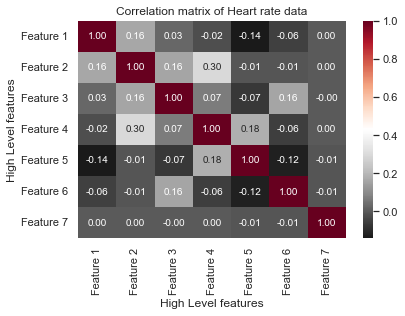

In [19]:

df_small = df.iloc[:,2:9]
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True,fmt='.2f', cmap='RdGy_r')
plt.title("Correlation matrix of Heart rate data")
plt.xlabel("High Level features")
plt.ylabel("High Level features")
plt.savefig("Images\Heart_Rate_correlation.png")
plt.show()

## Note:

There are multiple ways to deal with the features which are correlated. The easiest way is to delete or eliminate one of the perfectly correlated features. Another way is to use a dimension reduction algorithm such as Principle Component Analysis (PCA).

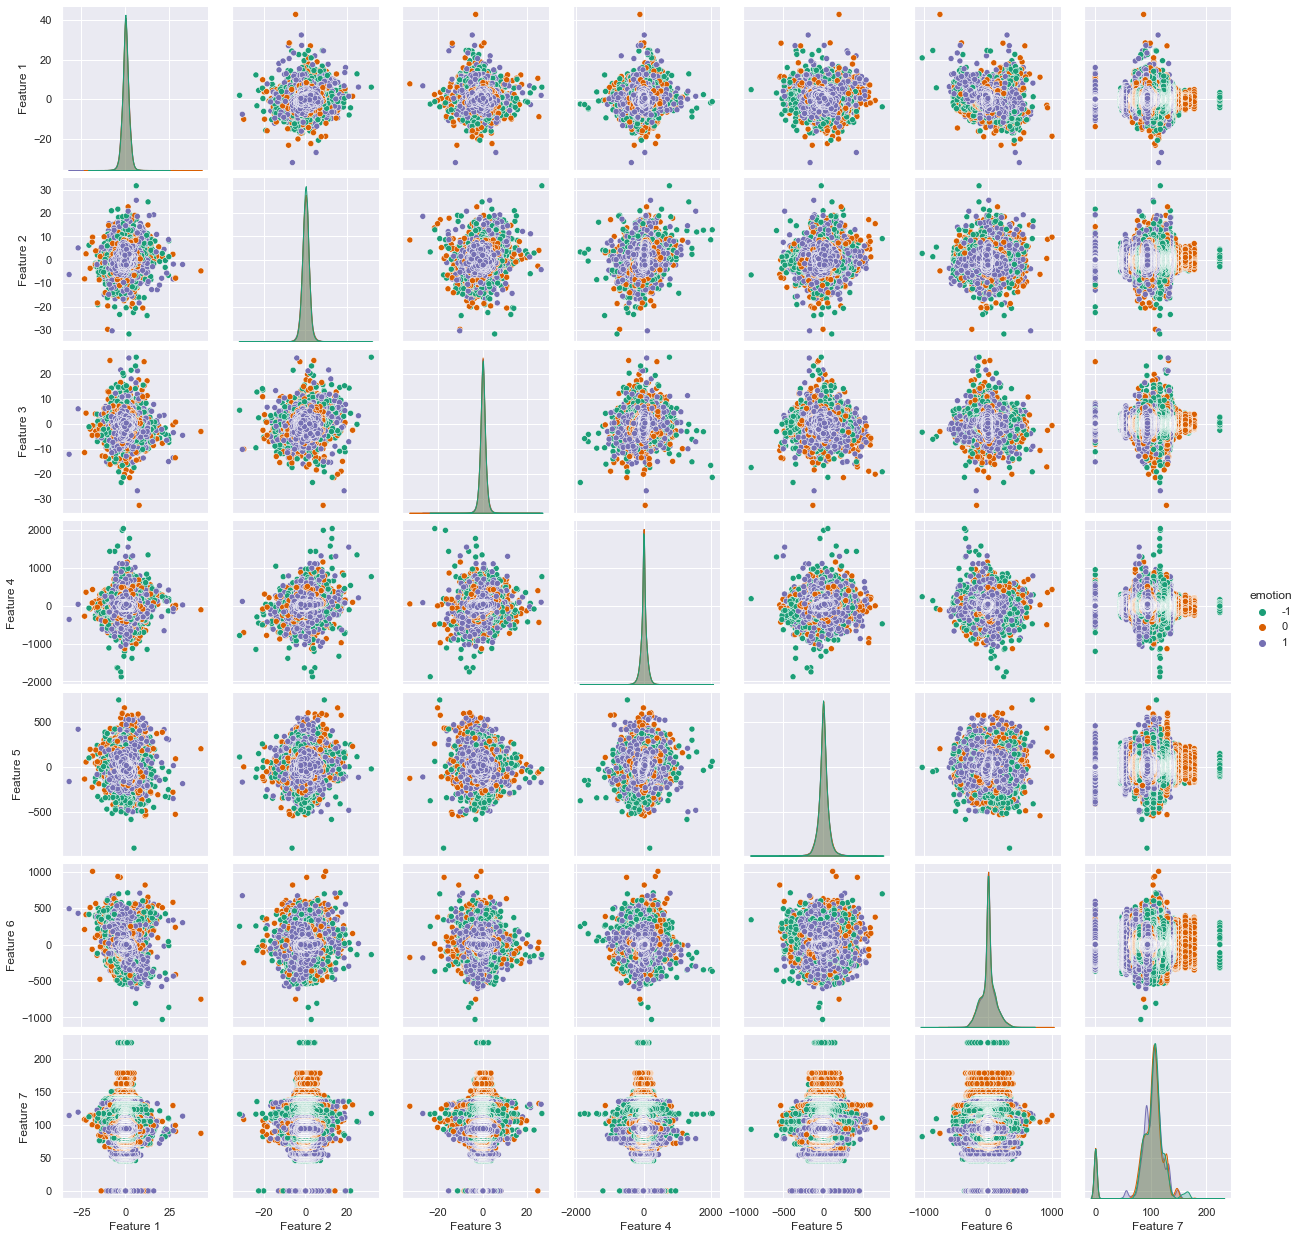

In [12]:
sns.pairplot(df[['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7'
                 'emotion']],hue='emotion', palette='Dark2')

### Observation
    
   This plot displays features in another way, like a correlation table and plot by using the function features_dist(data).   Along the diagonal, we have a histogram showing the distribution of each of the variables. As you can see in the previous diagram, all features except feature 7 have a normal distribution. In each subplot, three colors show distribution based on 'emotion'. Feature 7 is not correlated with other features. We can ignore the correlation between other features. Also, the     distribution of each emotion in every plot is equal.

   
